In [19]:
# Import the dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
city_data = []


In [21]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [22]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [23]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size= 1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_Ings = zip(lats, lngs)
lat_Ings

In [24]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_Ings)

In [25]:
# Use the  print() function to display the latitudes and longitudes combinations.

for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

9.081800486194865 40.74552237802786
88.88449265264555 99.1817991892882
-23.77956967688081 139.5649279141765
84.38154532236905 -89.5641820835581
-12.110430185811964 15.560083324829861
76.3398738983689 -97.9409724986346
-31.924546466717224 94.22607417187209
-22.710744546306046 -105.37248334252514
-89.53057889866247 85.700513334064
-30.31811464999484 154.63784082154848
-4.215862038817306 -25.038066282613386
-32.977692965913306 -137.3493048379919
30.017177029587288 -133.48036552749
-63.19334593255918 123.56755116044172
19.340069533251395 150.7780403909931
67.6844796021758 -28.049513199390077
-77.33357399597426 74.70940766989699
79.31689146258591 -179.99296089284508
17.355341413022273 104.94969189285172
-28.391917269605457 -66.62692114109235
-73.31394808851653 -159.51521655881817
-86.32176751234817 -164.21221564972265
53.46174197636472 72.4483914022218
73.22492736369924 28.895564325995025
-64.95271923519044 39.41337687667243
-41.45742378938651 -73.50789429126147
-32.78992885175191 -0.155418

-11.005896804359466 9.615268459629874
-75.22320439947346 70.91432351877097
1.6873180721443077 148.64206771799707
-3.0149317789742582 6.954201199525869
1.741824915421887 -65.88470006872043
23.502848634598948 -119.73629142289593
-11.03595417477986 170.26185463118327
6.18686940304427 -63.91658807860627
36.66066975019642 146.69076787536312
-30.940151636846053 -68.54353803163808
-38.622339377414775 -135.488689616462
80.1245661170372 -141.45295965826492
19.110263276260625 -42.735133982912686
-53.791829453047264 155.77080648548355
5.1659777970115215 -76.5423270516321
62.42658494979341 154.94835359901208
3.7963716528516755 1.4163966006758528
62.92882390755773 54.95323398747337
50.28592128502834 -77.09196129601172
-1.3965785120871885 67.07822582547908
86.4637780355074 37.078846519752915
-31.25521276829045 91.21696713709912
-85.33334300213014 35.9515874461035
-61.10612159403023 41.22558256344021
-50.83568394133816 -122.223111165082
67.84649990602867 111.73896805909334
-61.53482054611446 57.29497

2.177442714008066 57.74190035211308
9.993468558734037 90.87023062870878
86.58678602769012 108.30534846700863
-47.76251486678665 41.4445688909268
88.94014230893262 -15.587587576522111
-73.72663698703086 -36.76981430221494
-0.4254649877317007 -35.5503316702264
-58.407691458718304 179.575967901846
-26.929592613050488 -0.3106579676455681
-61.02003998194297 -68.78344468658204
89.46872706757728 174.48126566931023
58.48954656738934 122.37691539229712
50.75191571734973 78.68733075680416
-62.13212732272498 142.22703753889198
-78.18323454815066 157.31222507477008
-24.51162765063242 -53.03728527967614
58.82779194313113 -8.197509912217242
-79.70824790023345 -24.819226304025534
-19.80694180989721 6.3578430448494885
-47.45277532661143 -155.2789881742782


In [26]:
from citipy import citipy

In [27]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

596

In [28]:
# Import the time library and the datetime module from the datetime library
import time

from datetime import datetime 


In [29]:
#  Create an empty list to hold the weather data.
city_data = []

# print the beginning of the logging.
print("Beginning Data Retrieval ")
print("-------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval 
-------------------------


In [30]:
# Loop through all the cities in our list.
for i in range(len(cities)):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]    

In [31]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 12 | asbe teferi
Processing Record 2 of Set 12 | khatanga
Processing Record 3 of Set 12 | mount isa
Processing Record 4 of Set 12 | qaanaaq
Processing Record 5 of Set 12 | huambo
Processing Record 6 of Set 12 | thompson
Processing Record 7 of Set 12 | geraldton
Processing Record 8 of Set 12 | puerto ayora
Processing Record 9 of Set 12 | busselton
Processing Record 10 of Set 12 | coffs harbour
Processing Record 11 of Set 12 | cabedelo
Processing Record 12 of Set 12 | rikitea
Processing Record 13 of Set 12 | pacific grove
Processing Record 14 of Set 12 | albany
Processing Record 15 of Set 12 | katsuura
Processing Record 16 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 17 of Set 12 | saint-philippe
Processing Record 18 of Set 12 | mys shmidta
City not found. Skipping...
Processing Record 19 of Set 12 | nakhon phanom
Processing Record 20 of Set 12 | catamarca
Processing Record 21 of Set 12 | mataura
Processing Record 22 of Set 12 | odessko

City not found. Skipping...
Processing Record 35 of Set 15 | zapolyarnyy
Processing Record 36 of Set 15 | amderma
City not found. Skipping...
Processing Record 37 of Set 15 | port hardy
Processing Record 38 of Set 15 | dikson
Processing Record 39 of Set 15 | saint anthony
Processing Record 40 of Set 15 | marneuli
Processing Record 41 of Set 15 | upernavik
Processing Record 42 of Set 15 | burkhala
City not found. Skipping...
Processing Record 43 of Set 15 | porto santo
Processing Record 44 of Set 15 | nizhneyansk
City not found. Skipping...
Processing Record 45 of Set 15 | alofi
Processing Record 46 of Set 15 | gibsons
Processing Record 47 of Set 15 | edd
Processing Record 48 of Set 15 | saldanha
Processing Record 49 of Set 15 | cidreira
Processing Record 50 of Set 15 | tyukhtet
Processing Record 1 of Set 16 | sao joao da barra
Processing Record 2 of Set 16 | ankazoabo
Processing Record 3 of Set 16 | castro
Processing Record 4 of Set 16 | talcahuano
Processing Record 5 of Set 16 | kamen

Processing Record 19 of Set 19 | anloga
Processing Record 20 of Set 19 | matagami
Processing Record 21 of Set 19 | vardo
Processing Record 22 of Set 19 | udachnyy
Processing Record 23 of Set 19 | salvador
Processing Record 24 of Set 19 | eyl
Processing Record 25 of Set 19 | navahrudak
Processing Record 26 of Set 19 | sassandra
Processing Record 27 of Set 19 | phan thiet
Processing Record 28 of Set 19 | khonuu
City not found. Skipping...
Processing Record 29 of Set 19 | san vicente
Processing Record 30 of Set 19 | thilogne
City not found. Skipping...
Processing Record 31 of Set 19 | majene
Processing Record 32 of Set 19 | flinders
Processing Record 33 of Set 19 | praia
Processing Record 34 of Set 19 | ghogha
Processing Record 35 of Set 19 | porto nacional
Processing Record 36 of Set 19 | troy
Processing Record 37 of Set 19 | rio grande
Processing Record 38 of Set 19 | camacha
Processing Record 39 of Set 19 | diego de almagro
Processing Record 40 of Set 19 | shimoda
Processing Record 41 

Processing Record 9 of Set 23 | les escoumins
Processing Record 10 of Set 23 | saint combs
City not found. Skipping...
Processing Record 11 of Set 23 | itoman
Processing Record 12 of Set 23 | kuytun
Processing Record 13 of Set 23 | remuna
Processing Record 14 of Set 23 | umm kaddadah
Processing Record 15 of Set 23 | san angelo
Processing Record 16 of Set 23 | valparaiso
Processing Record 17 of Set 23 | bilibino
Processing Record 18 of Set 23 | kitob
Processing Record 19 of Set 23 | vung tau
Processing Record 20 of Set 23 | college
Processing Record 21 of Set 23 | kenai
Processing Record 22 of Set 23 | xadani
City not found. Skipping...
Processing Record 23 of Set 23 | hobyo
Processing Record 24 of Set 23 | baghdad
Processing Record 25 of Set 23 | batagay
Processing Record 26 of Set 23 | aloleng
Processing Record 27 of Set 23 | viligili
City not found. Skipping...
Processing Record 28 of Set 23 | jiddah
City not found. Skipping...
Processing Record 29 of Set 23 | coihaique
Processing Re

In [32]:
len(city_data)

547

In [38]:
# Convert the array of dictionaries to a pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Asbe Teferi,9.0833,40.8667,61.03,85,66,7.54,ET,2022-07-21 21:07:09
1,Khatanga,71.9667,102.5000,50.79,85,100,13.96,RU,2022-07-21 21:07:09
2,Mount Isa,-20.7333,139.5000,46.17,46,0,6.91,AU,2022-07-21 21:07:10
3,Qaanaaq,77.4840,-69.3632,43.74,80,100,7.96,GL,2022-07-21 21:07:10
4,Huambo,-12.7761,15.7392,60.85,33,71,2.15,AO,2022-07-21 21:07:10
5,Thompson,55.7435,-97.8558,58.33,81,100,6.73,CA,2022-07-21 21:07:11
6,Geraldton,-28.7667,114.6000,54.01,87,100,8.05,AU,2022-07-21 21:02:38
7,Puerto Ayora,-0.7393,-90.3518,80.56,87,58,4.00,EC,2022-07-21 21:07:11
8,Busselton,-33.6500,115.3333,57.81,78,67,10.85,AU,2022-07-21 21:07:11
9,Coffs Harbour,-30.3000,153.1333,60.76,82,75,17.27,AU,2022-07-21 21:07:03


In [44]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
new_column_order

['City',
 'Country',
 'Date',
 'Lat',
 'Lng',
 'Max Temp',
 'Humidity',
 'Cloudiness',
 'Wind Speed']

In [45]:
new_column_order = city_data_df[new_column_order]
new_column_order.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Asbe Teferi,ET,2022-07-21 21:07:09,9.0833,40.8667,61.03,85,66,7.54
1,Khatanga,RU,2022-07-21 21:07:09,71.9667,102.5000,50.79,85,100,13.96
2,Mount Isa,AU,2022-07-21 21:07:10,-20.7333,139.5000,46.17,46,0,6.91
3,Qaanaaq,GL,2022-07-21 21:07:10,77.4840,-69.3632,43.74,80,100,7.96
4,Huambo,AO,2022-07-21 21:07:10,-12.7761,15.7392,60.85,33,71,2.15
5,Thompson,CA,2022-07-21 21:07:11,55.7435,-97.8558,58.33,81,100,6.73
6,Geraldton,AU,2022-07-21 21:02:38,-28.7667,114.6000,54.01,87,100,8.05
7,Puerto Ayora,EC,2022-07-21 21:07:11,-0.7393,-90.3518,80.56,87,58,4.00
8,Busselton,AU,2022-07-21 21:07:11,-33.6500,115.3333,57.81,78,67,10.85
9,Coffs Harbour,AU,2022-07-21 21:07:03,-30.3000,153.1333,60.76,82,75,17.27


In [46]:
# Create the output file csv
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [47]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

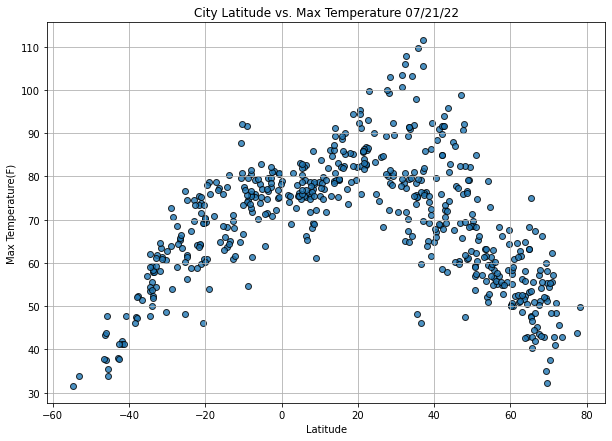

In [59]:
# Import time module
import time

# Build the scatter plot for latitude vs max temperature
plt.figure(figsize=(10,7))
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

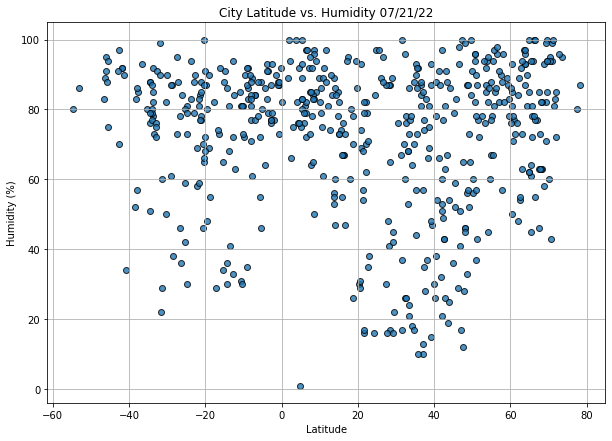

In [62]:
# Build the scatter plots for latitude vs. humidity.
plt.figure(figsize=(10,7))
plt.scatter (lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

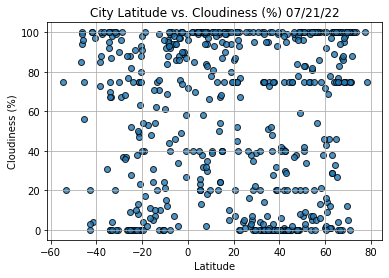

In [64]:
# Build the scatter plots for latitude va. cloudiness.
plt.scatter(lats,
           cloudiness,
            edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incoperate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figures
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

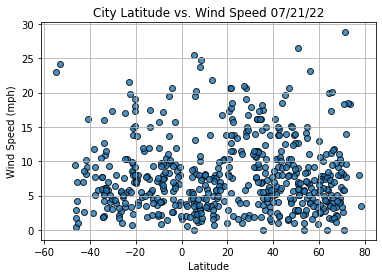

In [65]:
# Build the scatter plots for latitude vs wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()